## Trabalho Prático 2 - Machine Learning

### Objetivo

O objetivo deste trabalho é implementar e avaliar o algoritmo Naive Bayes aplicado a diferentes
problemas de classificação. Adicionalmente o algoritmo K-Médias deve ser utilizado para clustering.









In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
sns.set_theme()


### 1. Classificação - Base de Dados Iris

1.1. Conforme visto nas primeiras aulas, busque e carregue o Iris Dataset:
  - 4 Features: Sepal Length, Sepal Width, Petal Length, Petal Width
  - 3 Classes: Versicolor, Setosa e Virginica



In [48]:
# Obter dataset Íris utilizando o pacto SciKit Learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = pd.Series(iris.target_names[iris.target])
X = iris.data
y = iris.target
caracteristicas = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1.2. Com objetivo de visualizar os dados, plote os gráficos a seguir:
  - As 6 combinações em 2D de dois dos quatro atributos do Iris dataset.
  - As 4 combinações em 3D de três dos quatro atributos do Iris dataset.



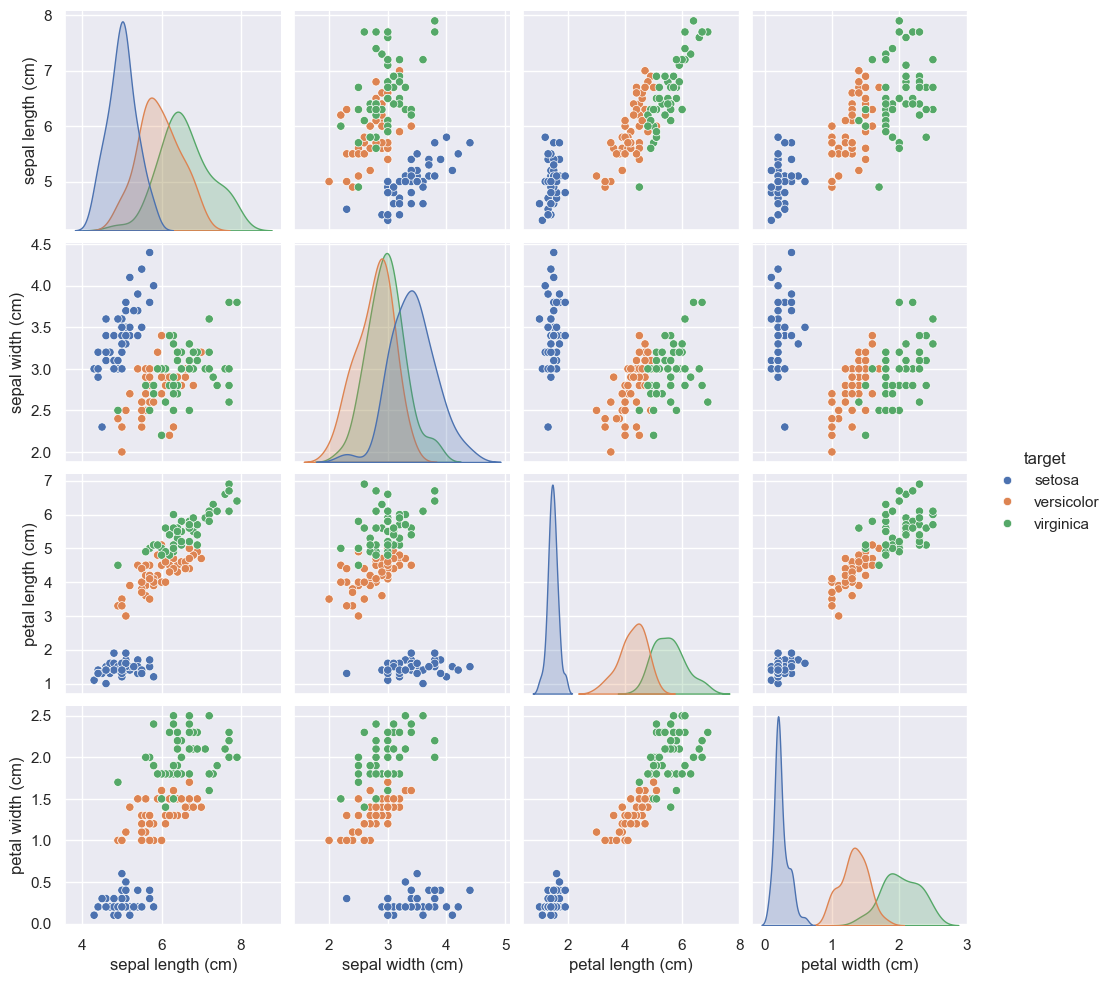

In [8]:
sns.pairplot(df, hue="target")

1.3. Implemente o algoritmo Gaussian Naive Bayes e aplique à base de dados.
  - Plote a superfície de decisão obtida pelo algoritmo.


In [40]:
# Implementação do Naive Bayes utilizando classe
class ClassificadorNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.media = {}
        self.variancia = {}
        self.anteriores = {}

        for classe in self.classes:
            X_classe = X[y == classe]
            self.media[classe] = np.mean(X_classe, axis=0)
            self.variancia[classe] = np.var(X_classe, axis=0)
            self.anteriores[classe] = X_classe.shape[0] / X.shape[0]

    def calcular_probabilidades(self, media, variancia, x):
        eps = 1e-6  # para evitar divisão por zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * variancia + eps)
        exponent = np.exp(-((x - media) ** 2) / (2 * variancia + eps))
        return coeff * exponent

    def calcular_posteriores(self, x):
        posteriors = []

        for classe in self.classes:
            prior = np.log(self.anteriores[classe])
            likelihoods = np.sum(np.log(self.calcular_probabilidades(self.media[classe], self.variancia[classe], x)))
            posterior = prior + likelihoods
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.calcular_posteriores(x) for x in X])

    def plotar_fronteira_decisao():
        pass


In [15]:

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o classificador
nb = ClassificadorNaiveBayes()

# Treinar o modelo
nb.fit(X_train, y_train)

# Fazer previsões
y_pred = nb.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = np.mean(y_pred == y_test)
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.98


Acurácia[sepal length (cm) x sepal width (cm)]: 0.82
0 0
Acurácia[sepal length (cm) x petal length (cm)]: 0.93
0 1
Acurácia[sepal length (cm) x petal width (cm)]: 1.00
0 2
Acurácia[sepal width (cm) x petal length (cm)]: 0.96
1 0
Acurácia[sepal width (cm) x petal width (cm)]: 0.96
1 1
Acurácia[petal length (cm) x petal width (cm)]: 1.00
1 2


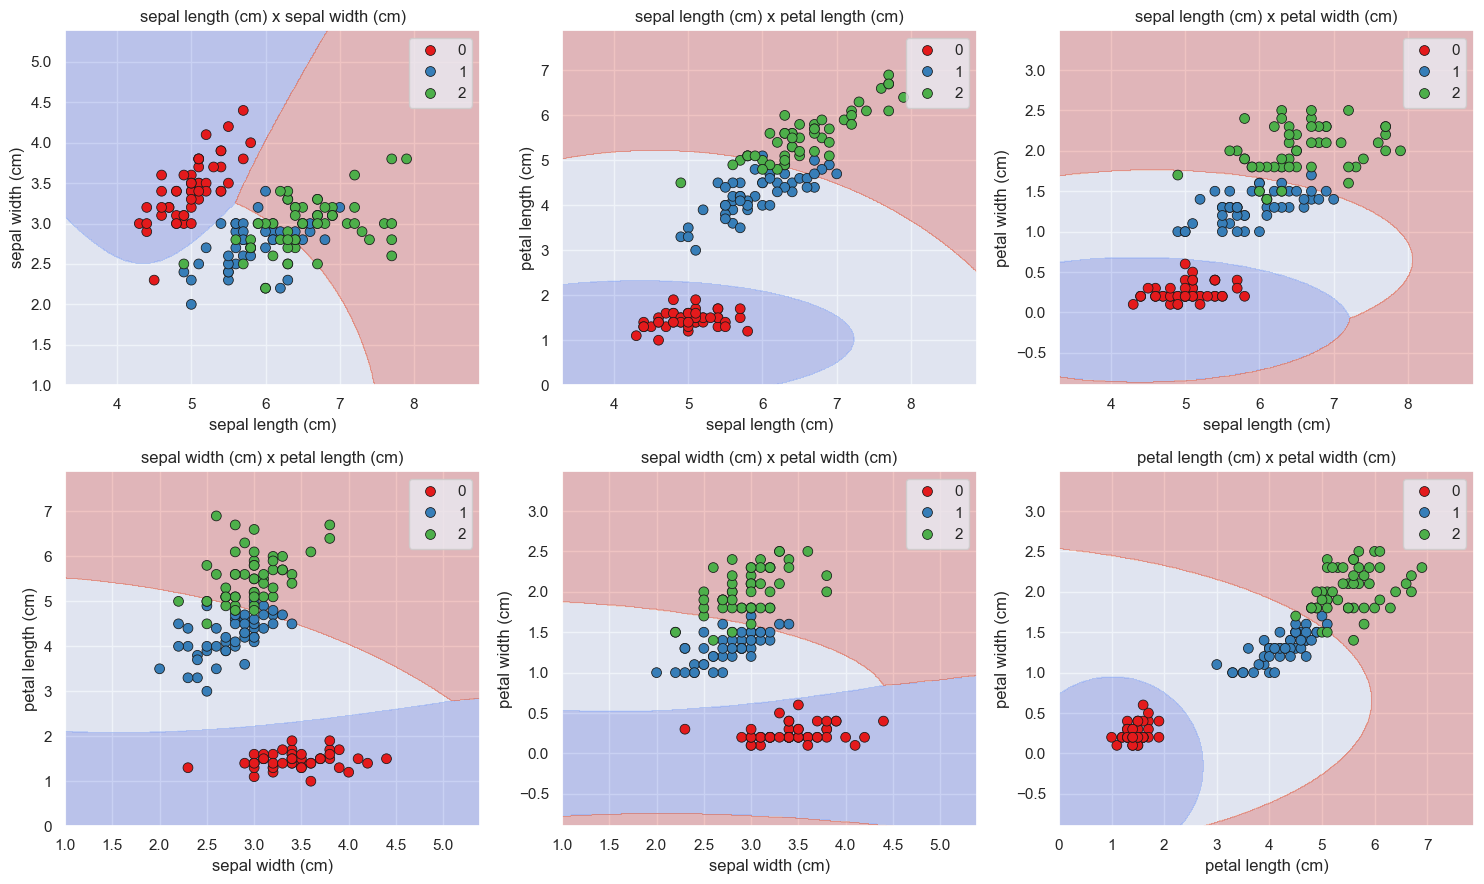

In [69]:
# Plotar a fronteira de decisão
fig,axes = plt.subplots(2,3,figsize=(15, 9))

pares_caracteristicas = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i,par in enumerate(pares_caracteristicas):
  X = iris.data[:, par]
  y = iris.target
  
  # Dividir o conjunto de dados em conjunto de treinamento e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Inicializar o classificador
  nb = ClassificadorNaiveBayes()

  # Treinar o modelo
  nb.fit(X_train, y_train)

  # Fazer previsões
  y_pred = nb.predict(X_test)

  # Avaliar a acurácia do modelo
  accuracy = np.mean(y_pred == y_test)
  print(f"Acurácia[{caracteristicas[par[0]]} x {caracteristicas[par[1]]}]: {accuracy:.2f}")
  
  # Plotar a fronteira de decisão
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                      np.arange(y_min, y_max, 0.01))

  # Prever para cada ponto na grade
  grid_points = np.c_[xx.ravel(), yy.ravel()]
  Z = nb.predict(grid_points)
  Z = Z.reshape(xx.shape)
  
  i_ax = i // 3
  j_ax = i % 3

  ax = axes[i_ax,j_ax]
  print(i // 3, i % 3)
  ax.contourf(xx, yy, Z, alpha=0.3, cmap=sns.color_palette("coolwarm", as_cmap=True))
  sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k', s=50, ax=ax)
  ax.set_xlabel(caracteristicas[par[0]])
  ax.set_ylabel(caracteristicas[par[1]])
  ax.set_title(f"{caracteristicas[par[0]]} x {caracteristicas[par[1]]}")


plt.tight_layout()
plt.show()
  
  


1.4. Implemente o algoritmo Regressão Logística (2 versões, com e sem feature engineering) e aplique à base de dados.
- Encontre o melhor valor para o parâmetro αe para o grau do polinômio na versão com feature engineering.
- Plote a superfície de decisão obtida pelo algoritmo.




1.5. Compare a eficácia dos classificadores com relação à acurácia, utilizando a divisão dos dados (Treinamento, Validação e Teste). 
- Execute cada experimento 10 vezes e compare as médias dos resultados.



1.6. Retire os rótulos da base de dados e Implemente o algoritmo K-Médias para encontrar agrupamentos nos dados. 
Utilizando diferentes valores de K, teste diferentes métricas de distância (pelo menos 3) e avalie os clusters obtidos.
- Plote os clusters e também os centróides finais obtidos.
- Compare visualmente os clusters com as classes reais do problema.

### 2. Classificação - Base de Dados Bi-dimensional

Com o objetivo de fixar o conteúdo, você
deverá implementar o algoritmo Gaussian Naive Bayes, e aplicar à base de dados para predição
de aprovação de um estudante com base nos resultados de 2 avaliações realizadas por ele.

A base de dados(arquivo ex2data1.txt utilizada no TP1) contem dados históricos referentes a
avaliações passadas, onde as colunas da base são: Avaliação 1, Avaliação 2 e resultado(aprovado
ou reprovado). Compare com os resultados obtidos no TP1. Os resultados são melhores do que
a regressão logística implementada no TP1?

Após implementar o algoritmo, mostre a superfície de decisão gerada por ele e compare os
resultados(Acurácia média e tempo computacional para o treinamento e o teste) utilizando
validação cruzada.

### 3. Classificação - Base Câncer de Mama

O objetivo agora é implementar o algoritmo Gaus-
sian Naive Bayes e Regressão Logística para resolução do problema de detecção de pacientes
com câncer de mama. Os algoritmos deverão ser comparados ao final, onde você deverá apon-
tar os prós e contras dos algoritmos com relação ao desempenho obtido. Não se esqueça de
normalizar e separar os dados(treinamento, validação e teste) para efetuar uma avaliação
correta.

A base de dados a ser utilizada nesta questão é conhecida como Wisconsin Diagnostic Breast
Cancer - WDBC e foi produzida pelo Dr. William H. Wolberg, pesquisador do departamento
de Cirurgia Geral da Universidade de Wisconsin. Ela está disponível publicamente no UCI
Machine Learning Repository (<https://archive.ics.uci.edu/static/public/17/breast+cancer+
wisconsin+diagnostic.zip>). Esta base de dados é composta por 569 pacientes (357 saudáveis
e 212 com câncer) e 32 campos (dos quais 30 atributos são úteis) no total, sendo que o primeiro
pode ser descartado, por se tratar do identificador do paciente e o último campo é o rótulo da
classe (0 - Saudável, 1 - com Câncer).